In [3]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

In [4]:
pwd

'C:\\Users\\HP\\PYTHON Alabs\\INTERNSHIP PROJECTS\\Life Insurance Project'

In [5]:
train_data = pd.read_csv("C:\\Users\\HP\\PYTHON Alabs\\INTERNSHIP PROJECTS\\Life Insurance Project\\Data\\train.csv")
test_data = pd.read_csv("C:\\Users\\HP\\PYTHON Alabs\\INTERNSHIP PROJECTS\\Life Insurance Project\\Data\\test.csv")

In [6]:
train_data.shape

(59381, 128)

In [7]:
test_data.shape

(19765, 127)

In [8]:
## Converting target variable
## We are making 0 to 7 as one class and 8 as another class
train_data['Modified_Response']  = train_data['Response'].apply(lambda x : 0 if x<=7 and x>=0 else (1 if x==8 else -1))

## Categorizing BMI, Age ,Height and Weight

In [10]:
# BMI Categorization
conditions = [
    (train_data['BMI'] <= train_data['BMI'].quantile(0.25)),
    (train_data['BMI'] > train_data['BMI'].quantile(0.25)) & (train_data['BMI'] <= train_data['BMI'].quantile(0.75)),
    (train_data['BMI'] > train_data['BMI'].quantile(0.75))]

choices = ['under_weight', 'average', 'overweight']

train_data['BMI_Wt'] = np.select(conditions, choices)


# Age Categorization
conditions = [
    (train_data['Ins_Age'] <= train_data['Ins_Age'].quantile(0.25)),
    (train_data['Ins_Age'] > train_data['Ins_Age'].quantile(0.25)) & (train_data['Ins_Age'] <= train_data['Ins_Age'].quantile(0.75)),
    (train_data['Ins_Age'] > train_data['Ins_Age'].quantile(0.75))]

choices = ['young', 'average', 'old']
train_data['Old_Young'] = np.select(conditions, choices)

# Height Categorization
conditions = [
    (train_data['Ht'] <= train_data['Ht'].quantile(0.25)),
    (train_data['Ht'] > train_data['Ht'].quantile(0.25)) & (train_data['Ht'] <= train_data['Ht'].quantile(0.75)),
    (train_data['Ht'] > train_data['Ht'].quantile(0.75))]

choices = ['short', 'average', 'tall']

train_data['Short_Tall'] = np.select(conditions, choices)

# Weight Categorization
conditions = [
    (train_data['Wt'] <= train_data['Wt'].quantile(0.25)),
    (train_data['Wt'] > train_data['Wt'].quantile(0.25)) & (train_data['Wt'] <= train_data['Wt'].quantile(0.75)),
    (train_data['Wt'] > train_data['Wt'].quantile(0.75))]

choices = ['thin', 'average', 'fat']

train_data['Thin_Fat'] = np.select(conditions, choices)

### Multivariate Risk Categorization 

In [12]:
# Risk Categorization based on BMI, Weight, and Age
conditions = [
    # High Risk: Overweight, old, tall, or fat individuals
    (train_data['BMI_Wt'] == 'overweight') & 
    (train_data['Old_Young'] == 'old') & 
    (train_data['Thin_Fat'] == 'fat'),
    
    # Low Risk: Underweight, young, short, or thin individuals
    (train_data['BMI_Wt'] == 'under_weight') & 
    (train_data['Old_Young'] == 'young') & 
    (train_data['Thin_Fat'] == 'thin'),
    
    # Average Risk: Everyone else
    True
]

choices = ['High Risk', 'Low Risk', 'Average Risk']

train_data['Risk_Category'] = np.select(conditions, choices)

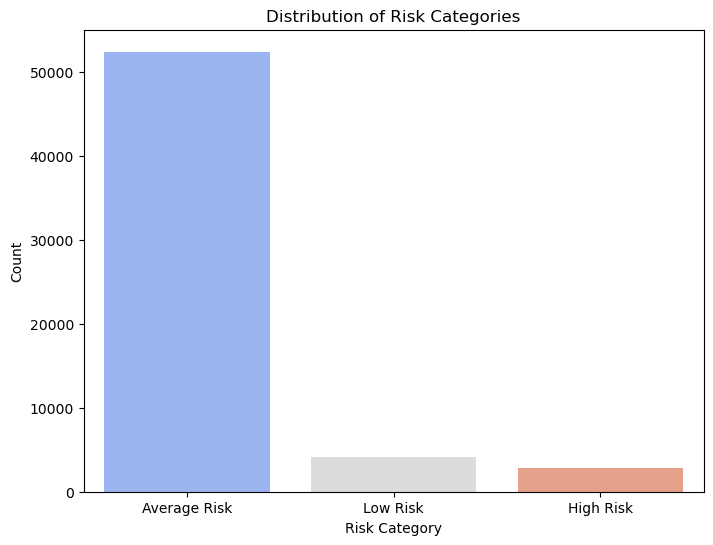

Average Risk    52414
Low Risk         4168
High Risk        2799
Name: Risk_Category, dtype: int64


In [13]:
# Visualizing Risk Categorization with Three Graphs

# Count Plot for Risk Categories
plt.figure(figsize=(8, 6))
sns.countplot(data=train_data, x='Risk_Category', palette='coolwarm')
plt.title('Distribution of Risk Categories')
plt.xlabel('Risk Category')
plt.ylabel('Count')
plt.show()

# Print values for each Risk Category
risk_counts = train_data['Risk_Category'].value_counts()
print(risk_counts)

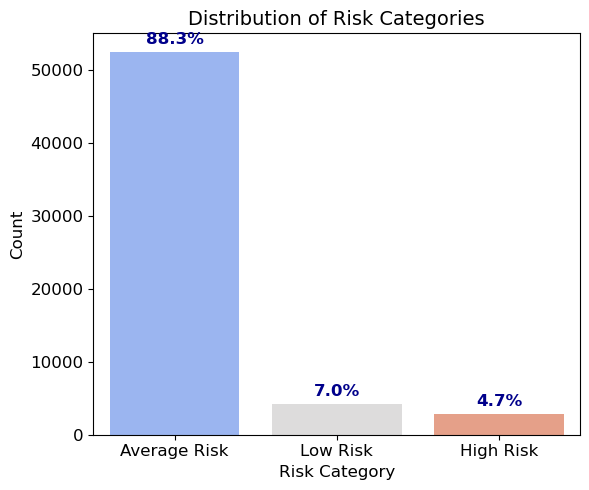

In [40]:
# Count Plot for Risk Categories with Improved Percentages
plt.figure(figsize=(6, 5))
ax = sns.countplot(data=train_data, x='Risk_Category', palette='coolwarm')
plt.title('Distribution of Risk Categories', fontsize=14)
plt.xlabel('Risk Category', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Annotate percentages on the bars with improved styling
total = len(train_data)  # Total number of rows
for p in ax.patches:
    percentage = f"{100 * p.get_height() / total:.1f}%"  # Calculate percentage
    x = p.get_x() + p.get_width() / 2  # X position of annotation
    y = p.get_height() + 0.02 * total  # Y position of annotation, adjusted relative to total for clarity
    ax.annotate(
        percentage,
        (x, y),
        ha='center',
        fontsize=12,
        fontweight='bold',
        color='darkblue'
    )

# Adjust tick labels for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

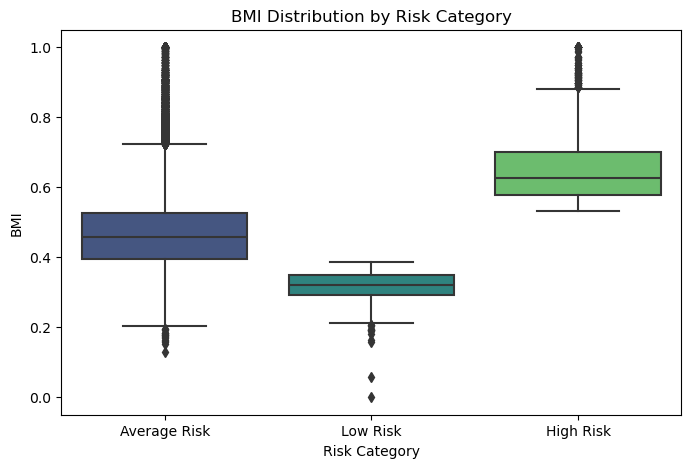

                 count      mean       std       min       25%       50%  \
Risk_Category                                                              
Average Risk   52414.0  0.471732  0.112968  0.130238  0.395237  0.457067   
High Risk       2799.0  0.650599  0.095269  0.533020  0.576961  0.626094   
Low Risk        4168.0  0.319279  0.039498  0.000000  0.293041  0.321806   

                    75%       max  
Risk_Category                      
Average Risk   0.526285  1.000000  
High Risk      0.700027  1.000000  
Low Risk       0.350085  0.385517  


In [44]:
# Boxplot for BMI by Risk Category
plt.figure(figsize=(8, 5))
sns.boxplot(data=train_data, x='Risk_Category', y='BMI', palette='viridis')
plt.title('BMI Distribution by Risk Category')
plt.xlabel('Risk Category')
plt.ylabel('BMI')
plt.show()

# Print summary statistics for BMI by Risk Category
bmi_stats = train_data.groupby('Risk_Category')['BMI'].describe()
print(bmi_stats)

## Response Analysis for High Risk

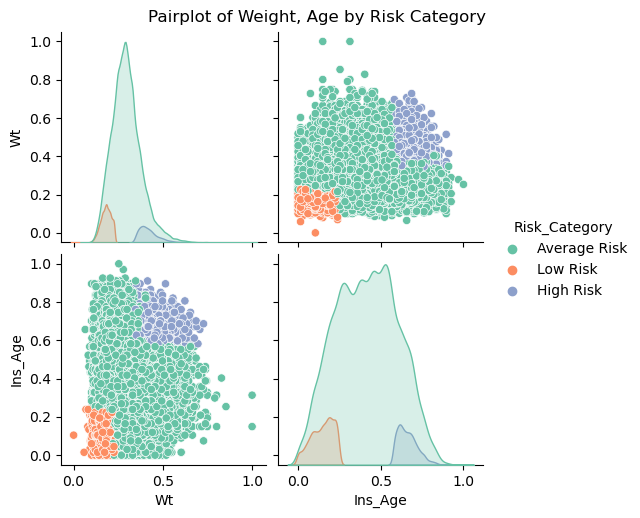

                    Wt                                                    \
                 count      mean       std       min       25%       50%   
Risk_Category                                                              
Average Risk   52414.0  0.294653  0.082673  0.064854  0.238494  0.288703   
High Risk       2799.0  0.421711  0.057457  0.347280  0.380753  0.410042   
Low Risk        4168.0  0.179895  0.028774  0.000000  0.163180  0.184100   

                                   Ins_Age                               \
                    75%       max    count      mean       std      min   
Risk_Category                                                             
Average Risk   0.341004  1.000000  52414.0  0.412646  0.185934  0.00000   
High Risk      0.447699  0.728033   2799.0  0.661206  0.058682  0.58209   
Low Risk       0.205021  0.225941   4168.0  0.144863  0.066567  0.00000   

                                                       
                    25%       50%   

In [39]:
# Pairplot for Height, Weight, and Age with Risk Category
sns.pairplot(train_data, vars=['Wt', 'Ins_Age'], hue='Risk_Category', palette='Set2', diag_kind='kde', height=2.5)
plt.suptitle('Pairplot of Weight, Age by Risk Category', y=1.02)
plt.show()

# Summary statistics for Weight (Wt) and Age (Ins_Age) by Risk Category
wt_age_stats = train_data.groupby('Risk_Category')[['Wt', 'Ins_Age']].describe()
print(wt_age_stats)

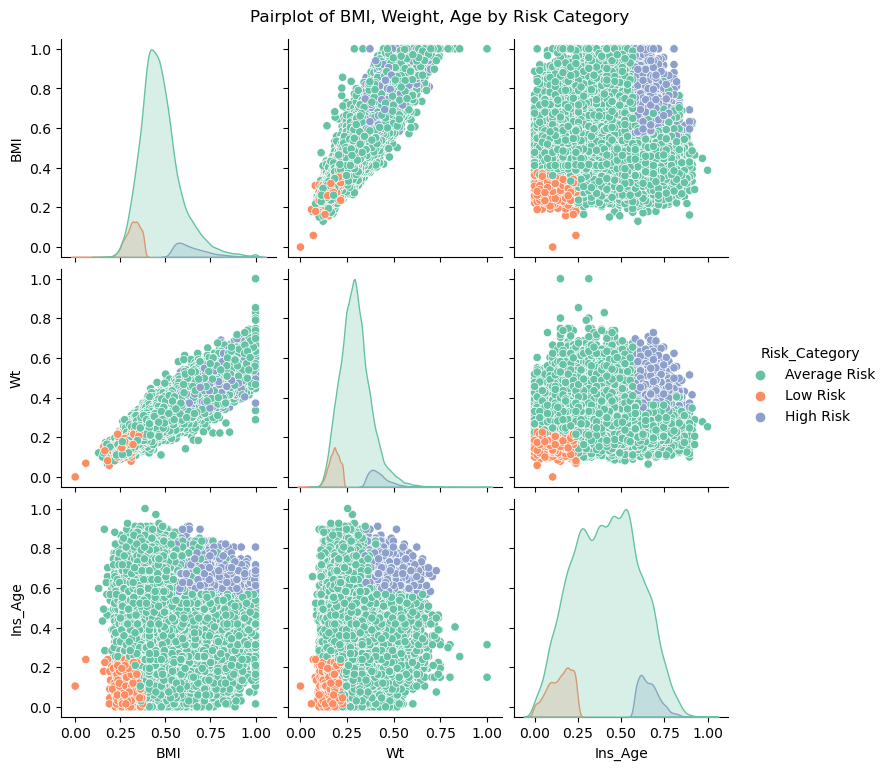

                   BMI                                                    \
                 count      mean       std       min       25%       50%   
Risk_Category                                                              
Average Risk   52414.0  0.471732  0.112968  0.130238  0.395237  0.457067   
High Risk       2799.0  0.650599  0.095269  0.533020  0.576961  0.626094   
Low Risk        4168.0  0.319279  0.039498  0.000000  0.293041  0.321806   

                                        Wt            ...                      \
                    75%       max    count      mean  ...       75%       max   
Risk_Category                                         ...                       
Average Risk   0.526285  1.000000  52414.0  0.294653  ...  0.341004  1.000000   
High Risk      0.700027  1.000000   2799.0  0.421711  ...  0.447699  0.728033   
Low Risk       0.350085  0.385517   4168.0  0.179895  ...  0.205021  0.225941   

               Ins_Age                                  

In [46]:
# Pairplot for Height, Weight, and Age with Risk Category
sns.pairplot(train_data, vars=['BMI', 'Wt', 'Ins_Age'], hue='Risk_Category', palette='Set2', diag_kind='kde', height=2.5)
plt.suptitle('Pairplot of BMI, Weight, Age by Risk Category', y=1.02)
plt.show()

# Summary statistics for Weight (Wt) and Age (Ins_Age) by Risk Category
wt_age_stats = train_data.groupby('Risk_Category')[['BMI', 'Wt', 'Ins_Age']].describe()
print(wt_age_stats)

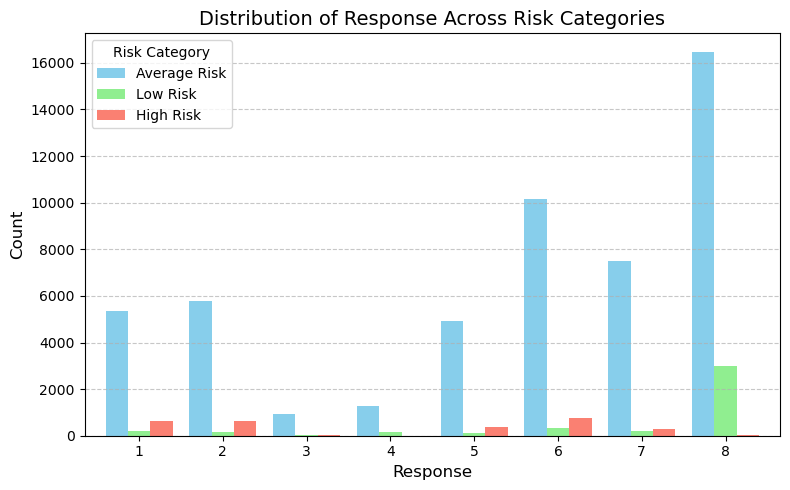

In [55]:
# Filter data for each Risk Category
average_risk_data = train_data[train_data['Risk_Category'] == 'Average Risk']
low_risk_data = train_data[train_data['Risk_Category'] == 'Low Risk']
high_risk_data = train_data[train_data['Risk_Category'] == 'High Risk']

# Count values for 'Response' in each category
average_risk_counts = average_risk_data['Response'].value_counts().sort_index()
low_risk_counts = low_risk_data['Response'].value_counts().sort_index()
high_risk_counts = high_risk_data['Response'].value_counts().sort_index()

# Combine data into a DataFrame for plotting
response_counts = pd.DataFrame({
    'Average Risk': average_risk_counts,
    'Low Risk': low_risk_counts,
    'High Risk': high_risk_counts
}).fillna(0)

# Plot grouped bar chart
response_counts.plot(
    kind='bar', 
    figsize=(8, 5), 
    color=['skyblue', 'lightgreen', 'salmon'], 
    width=0.8
)
plt.title('Distribution of Response Across Risk Categories', fontsize=14)
plt.xlabel('Response', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Risk Category', fontsize=10)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [53]:
# Print counts for 'Response' in each Risk Category
print("Counts for Average Risk:")
print(average_risk_counts)

print("\nCounts for Low Risk:")
print(low_risk_counts)

print("\nCounts for High Risk:")
print(high_risk_counts)


Counts for Average Risk:
1     5363
2     5767
3      947
4     1275
5     4920
6    10179
7     7517
8    16446
Name: Response, dtype: int64

Counts for Low Risk:
1     198
2     143
3      34
4     149
5     121
6     312
7     202
8    3009
Name: Response, dtype: int64

Counts for High Risk:
1    646
2    642
3     32
4      4
5    391
6    742
7    308
8     34
Name: Response, dtype: int64


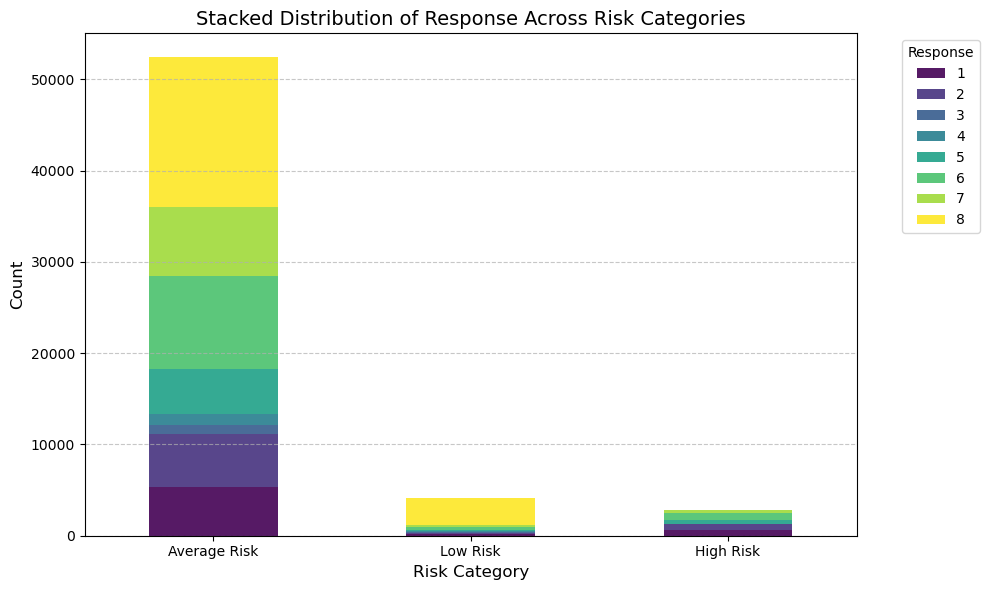

In [51]:
# Filter data for each Risk Category
average_risk_data = train_data[train_data['Risk_Category'] == 'Average Risk']
low_risk_data = train_data[train_data['Risk_Category'] == 'Low Risk']
high_risk_data = train_data[train_data['Risk_Category'] == 'High Risk']

# Count values for 'Response' in each category
average_risk_counts = average_risk_data['Response'].value_counts().sort_index()
low_risk_counts = low_risk_data['Response'].value_counts().sort_index()
high_risk_counts = high_risk_data['Response'].value_counts().sort_index()

# Combine data into a DataFrame for plotting
response_counts = pd.DataFrame({
    'Average Risk': average_risk_counts,
    'Low Risk': low_risk_counts,
    'High Risk': high_risk_counts
}).fillna(0)

# Transpose the DataFrame for stacking
response_counts = response_counts.T

# Plot stacked bar chart
response_counts.plot(
    kind='bar', 
    stacked=True, 
    figsize=(10, 6), 
    colormap='viridis',  # Use a color palette for differentiation
    alpha=0.9
)
plt.title('Stacked Distribution of Response Across Risk Categories', fontsize=14)
plt.xlabel('Risk Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Response', fontsize=10, loc='upper left', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Response Analysis for High Risk

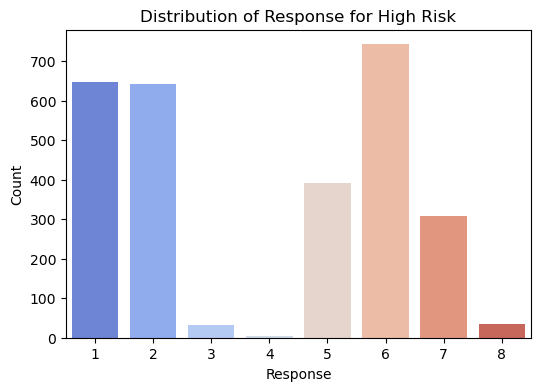

Counts for Response in High Risk:
6    742
1    646
2    642
5    391
7    308
8     34
3     32
4      4
Name: Response, dtype: int64


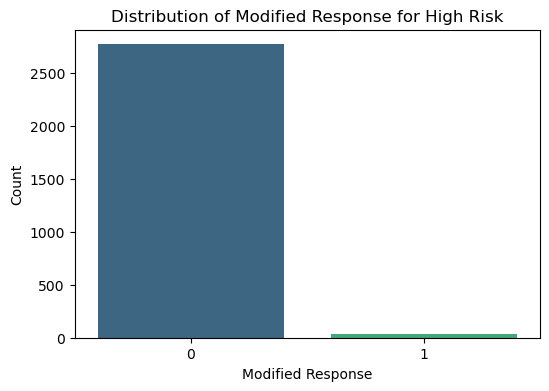

Counts for Modified Response in High Risk:
0    2765
1      34
Name: Modified_Response, dtype: int64


In [52]:
# Filter data for High Risk category
high_risk_data = train_data[train_data['Risk_Category'] == 'High Risk']

# Plot for original Response column
plt.figure(figsize=(6, 4))
sns.countplot(data=high_risk_data, x='Response', palette='coolwarm')
plt.title('Distribution of Response for High Risk')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

# Print values for original Response column
print("Counts for Response in High Risk:")
print(high_risk_data['Response'].value_counts())

# Plot for modified response column
plt.figure(figsize=(6, 4))
sns.countplot(data=high_risk_data, x='Modified_Response', palette='viridis')
plt.title('Distribution of Modified Response for High Risk')
plt.xlabel('Modified Response')
plt.ylabel('Count')
plt.show()

# Print values for modified Response column
print("Counts for Modified Response in High Risk:")
print(high_risk_data['Modified_Response'].value_counts())


## Response Analysis for Average Risk

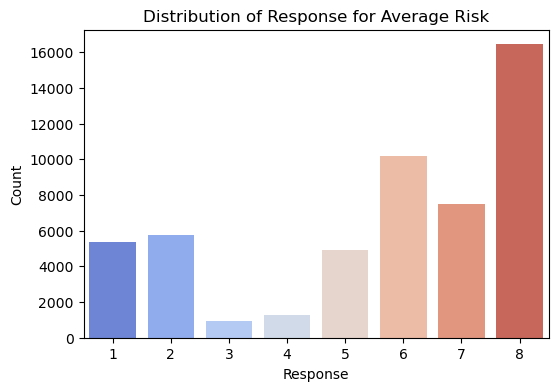

Counts for Response in Average Risk:
8    16446
6    10179
7     7517
2     5767
1     5363
5     4920
4     1275
3      947
Name: Response, dtype: int64


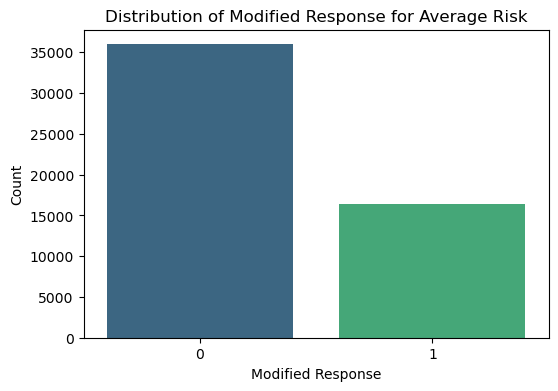

Counts for Modified Response in Average Risk:
0    35968
1    16446
Name: Modified_Response, dtype: int64


In [54]:
# Filter data for Average Risk category
average_risk_data = train_data[train_data['Risk_Category'] == 'Average Risk']

# Plot for original Response column
plt.figure(figsize=(6, 4))
sns.countplot(data=average_risk_data, x='Response', palette='coolwarm')
plt.title('Distribution of Response for Average Risk')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

# Print values for original Response column
print("Counts for Response in Average Risk:")
print(average_risk_data['Response'].value_counts())

# Plot for modified response column
plt.figure(figsize=(6, 4))
sns.countplot(data=average_risk_data, x='Modified_Response', palette='viridis')
plt.title('Distribution of Modified Response for Average Risk')
plt.xlabel('Modified Response')
plt.ylabel('Count')
plt.show()

# Print values for modified Response column
print("Counts for Modified Response in Average Risk:")
print(average_risk_data['Modified_Response'].value_counts())


## Response Analysis for Low Risk

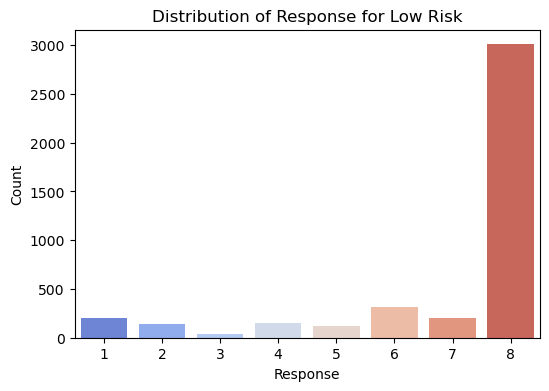

Counts for Response in Low Risk:
8    3009
6     312
7     202
1     198
4     149
2     143
5     121
3      34
Name: Response, dtype: int64


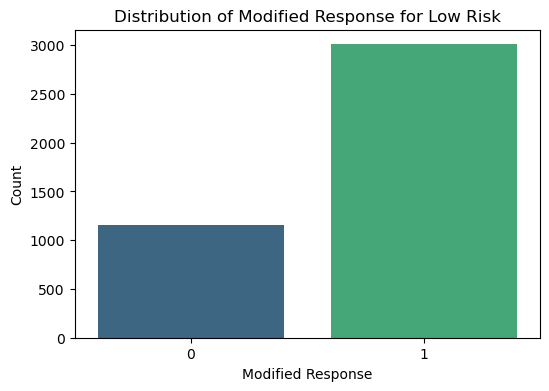

Counts for Modified Response in Low Risk:
1    3009
0    1159
Name: Modified_Response, dtype: int64


In [56]:
# Filter data for Low Risk category
low_risk_data = train_data[train_data['Risk_Category'] == 'Low Risk']

# Plot for original Response column
plt.figure(figsize=(6, 4))
sns.countplot(data=low_risk_data, x='Response', palette='coolwarm')
plt.title('Distribution of Response for Low Risk')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

# Print values for original Response column
print("Counts for Response in Low Risk:")
print(low_risk_data['Response'].value_counts())

# Plot for modified response column
plt.figure(figsize=(6, 4))
sns.countplot(data=low_risk_data, x='Modified_Response', palette='viridis')
plt.title('Distribution of Modified Response for Low Risk')
plt.xlabel('Modified Response')
plt.ylabel('Count')
plt.show()

# Print values for modified Response column
print("Counts for Modified Response in Low Risk:")
print(low_risk_data['Modified_Response'].value_counts())
